<a href="https://colab.research.google.com/github/gabipasse/LAPES_binary_trade_bot/blob/LAPES_mel/macd_trade_lapes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Macd

Sua função principal é monitorar tendências e indicar possíveis sinais de mudança, confirmação ou reversão.

Traders can use the MACD indicator to identify potential entry and exit points.

 é calculada por meio da diferença entre a média móvel curta e a média móvel longa.

 Traders use the MACD’s histogram to identify when bullish or bearish momentum is high and possibly for overbought/oversold signals.

[*********************100%%**********************]  1 of 1 completed


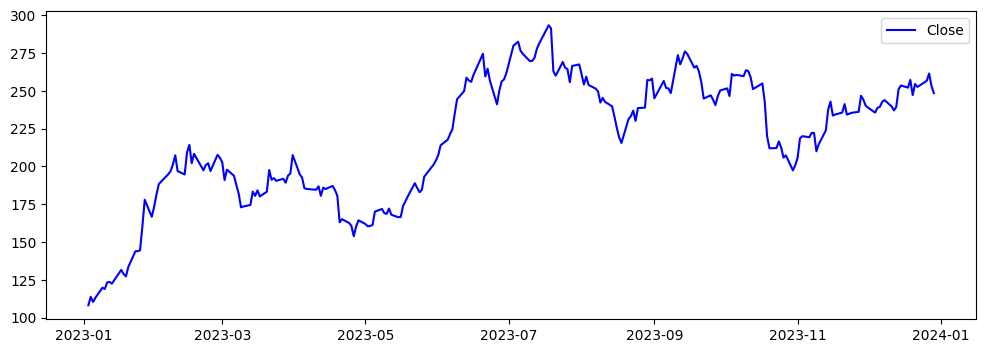

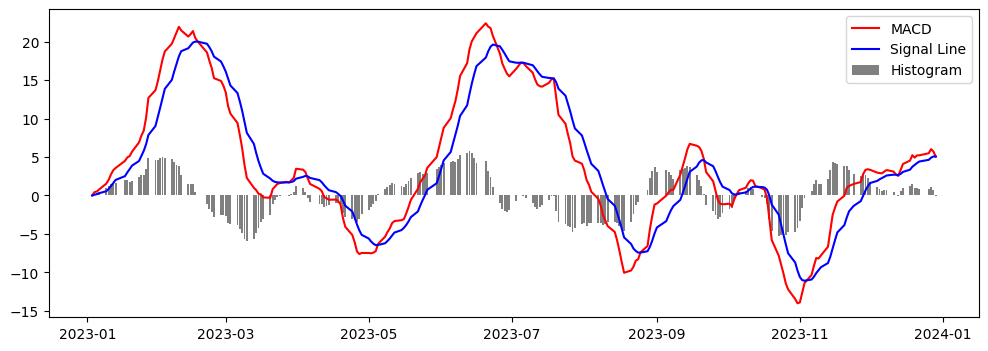

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


data = yf.download('TSLA', start='2023-01-01', end='2023-12-31')


short_ema = data['Close'].ewm(span=12, adjust=False).mean()
long_ema = data['Close'].ewm(span=26, adjust=False).mean()
macd = short_ema - long_ema
signal = macd.ewm(span=9, adjust=False).mean()
histogram = macd - signal


plt.figure(figsize=(12, 4))
plt.plot(data.index, data['Close'], label='Close', color='blue')
plt.legend()

plt.figure(figsize=(12, 4))
plt.plot(macd, label='MACD', color='red')
plt.plot(signal, label='Signal Line', color='blue')
plt.bar(histogram.index, histogram, label='Histogram', color='gray')
plt.legend()

plt.show()


In [3]:
pip install -U git+https://github.com/iqoptionapi/iqoptionapi.git

  Cloning https://github.com/iqoptionapi/iqoptionapi.git to /tmp/pip-req-build-y8b0rrh_
  Running command git clone --filter=blob:none --quiet https://github.com/iqoptionapi/iqoptionapi.git /tmp/pip-req-build-y8b0rrh_
  Resolved https://github.com/iqoptionapi/iqoptionapi.git to commit 8a903cc094a74af1ed935a56a2d6b5a9ed3319d7
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.6/515.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.6/275.6 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.3/92.3 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 18.2 MB/s eta 0:00:00
  Created wheel for iqoptionapi: filename=iqoptionapi-7.1.1-py3-none-any.whl size=82017 sha256=cbdf5be20787c7228bd06d6ccadf914c55450bf94a6754d7e8a85425064ba62d
  Stored in directory: /tmp/pip-ephem-wheel-cache-j4ynupac/w

In [4]:
pip install python-dotenv

In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
from iqoptionapi.stable_api import IQ_Option
import time
import logging
import os
from dotenv import load_dotenv

conta iqoption e pegando dados

In [6]:
load_dotenv()

False

In [7]:
iqoption_email = os.getenv("my_email")

In [8]:
iqoption_email

In [9]:
iqoption_password = os.getenv("my_password")

In [10]:
iqoption_password

In [11]:
logging.basicConfig(level=logging.DEBUG,format='%(asctime)s %(message)s')
Iq=IQ_Option('mel22070219@aluno.cesupa.br', 'iqoptionsenha')

In [12]:
check, reason=Iq.connect()
print(check, reason)

True None


In [13]:
goal="EURUSD"

In [14]:
velas = Iq.get_candles(goal,60,111,time.time())

In [15]:
df = pd.DataFrame(velas)

In [16]:
df.head()

,id,from,at,to,open,close,min,max,volume
0,2380588,1710370020,1710370080000000000,1710370080,1.095050,1.095040,1.095040,1.095070,59
1,2380589,1710370080,1710370140000000000,1710370140,1.095050,1.095055,1.095030,1.095065,78
2,2380590,1710370140,1710370200000000000,1710370200,1.095055,1.095040,1.095030,1.095065,60
3,2380591,1710370200,1710370260000000000,1710370260,1.095040,1.094990,1.094980,1.095065,82
4,2380592,1710370260,1710370320000000000,1710370320,1.094980,1.094985,1.094975,1.095010,90


definindos ema 12 e 26

In [17]:
df['ema12']= df['close'].ewm(span=12).mean()
df.ema12

0      1.095040
1      1.095048
2      1.095045
3      1.095028
4      1.095016
         ...   
106    1.094906
107    1.094902
108    1.094907
109    1.094907
110    1.094903
Name: ema12, Length: 111, dtype: float64

In [18]:
df['ema26']=df['close'].ewm(span=26).mean()
df.ema26

0      1.095040
1      1.095048
2      1.095045
3      1.095030
4      1.095019
         ...   
106    1.094949
107    1.094944
108    1.094943
109    1.094941
110    1.094936
Name: ema26, Length: 111, dtype: float64

In [19]:
#MACD = 12-period closing price EMA – 26-period closing price EMA
df['macd']=df['ema12']-df['ema26']
df.macd

0      0.000000e+00
1      3.365385e-07
2     -3.633230e-08
3     -2.010262e-06
4     -3.239506e-06
           ...     
106   -4.291794e-05
107   -4.224648e-05
108   -3.645364e-05
109   -3.349358e-05
110   -3.318547e-05
Name: macd, Length: 111, dtype: float64

In [20]:
#The signal line is the 9-period EMA of the MACD.
df['macd_signal']=df.macd.ewm(span=9).mean()
df.macd_signal

0      0.000000e+00
1      1.869658e-07
2      9.545019e-08
3     -6.178669e-07
4     -1.397745e-06
           ...     
106   -4.846082e-05
107   -4.721795e-05
108   -4.506509e-05
109   -4.275079e-05
110   -4.083772e-05
Name: macd_signal, Length: 111, dtype: float64

In [21]:
df['histogram']=df.macd-df.macd_signal
df.histogram

0      0.000000e+00
1      1.495726e-07
2     -1.317825e-07
3     -1.392395e-06
4     -1.841761e-06
           ...     
106    5.542884e-06
107    4.971472e-06
108    8.611449e-06
109    9.257212e-06
110    7.652257e-06
Name: histogram, Length: 111, dtype: float64

In [22]:
df.head()

,id,from,at,to,open,close,min,max,volume,ema12,ema26,macd,macd_signal,histogram
0,2380588,1710370020,1710370080000000000,1710370080,1.095050,1.095040,1.095040,1.095070,59,1.095040,1.095040,0.000000e+00,0.000000e+00,0.000000e+00
1,2380589,1710370080,1710370140000000000,1710370140,1.095050,1.095055,1.095030,1.095065,78,1.095048,1.095048,3.365385e-07,1.869658e-07,1.495726e-07
2,2380590,1710370140,1710370200000000000,1710370200,1.095055,1.095040,1.095030,1.095065,60,1.095045,1.095045,-3.633230e-08,9.545019e-08,-1.317825e-07
3,2380591,1710370200,1710370260000000000,1710370260,1.095040,1.094990,1.094980,1.095065,82,1.095028,1.095030,-2.010262e-06,-6.178669e-07,-1.392395e-06
4,2380592,1710370260,1710370320000000000,1710370320,1.094980,1.094985,1.094975,1.095010,90,1.095016,1.095019,-3.239506e-06,-1.397745e-06,-1.841761e-06


In [23]:
#We buy when the MACD is higher than the Signal line (histogram is positive)
#We sell when the MACD crosses below the Signal line (histogram is negative)

In [24]:
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.05, subplot_titles=("Close Price", "MACD"))


for index, row in df.iterrows():
    fig.add_trace(
        go.Scatter(
            x=df.index,
            y=df["close"],
            mode='lines',
            marker=dict(color='red'),

            showlegend=False),
        row=1, col=1
    )


fig.add_trace(
    go.Scatter(x=df.index, y=df['macd'], mode='lines', name='MACD', marker=dict(color='orange')),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=df.index, y=df['macd_signal'], mode='lines', name='Signal Line', marker=dict(color='blue')),
    row=2, col=1
)
fig.add_trace(
     go.Bar(x=df.index, y=df['histogram'], name='histogram', marker=dict(color='gray')),
    row=2, col=1

)

fig.show()